In [1]:
!pip install -q xgboost


[notice] A new release of pip is available: 25.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import
import pickle
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Carregando os dados
df = pd.read_csv("dataset.csv")

In [4]:
# Shape
df.shape

(23058, 30)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,AgeStartedWorking
0,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
1,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
2,41,Voluntary Resignation,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,8,0,1,6,4,0,5,Referral,33
3,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Marketing,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29
4,37,Voluntary Resignation,Travel_Rarely,Human Resources,6,4,Human Resources,1,Female,3,...,0,8,0,1,6,4,0,5,Referral,29


In [6]:
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeStartedWorking
count,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,...,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000,23058.000000
mean,37.035562,9.215413,2.914693,2.720054,2.730115,2.043846,2.724738,6415.708561,2.690693,15.215630,...,2.712768,0.794431,11.074941,2.804016,2.761688,6.910053,4.200755,2.164238,4.091335,25.960621
std,9.050759,8.106362,1.024470,1.094684,0.709159,1.089296,1.103915,4627.871795,2.499755,3.658836,...,1.081825,0.850228,7.565958,1.289432,0.706891,5.969888,3.609138,3.200890,3.548117,9.384428
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2900.250000,1.000000,12.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,20.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4898.000000,2.000000,14.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,25.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8120.000000,4.000000,18.000000,...,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,31.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,60.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23058 entries, 0 to 23057
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       23058 non-null  int64 
 1   Attrition                 23058 non-null  object
 2   BusinessTravel            23058 non-null  object
 3   Department                23058 non-null  object
 4   DistanceFromHome          23058 non-null  int64 
 5   Education                 23058 non-null  int64 
 6   EducationField            23058 non-null  object
 7   EnvironmentSatisfaction   23058 non-null  int64 
 8   Gender                    23058 non-null  object
 9   JobInvolvement            23058 non-null  int64 
 10  JobLevel                  23058 non-null  int64 
 11  JobRole                   23058 non-null  object
 12  JobSatisfaction           23058 non-null  int64 
 13  MaritalStatus             23058 non-null  object
 14  MonthlyIncome         

In [8]:
df['Attrition'].value_counts()

Attrition
Current employee         19370
Voluntary Resignation     3601
Termination                 87
Name: count, dtype: int64

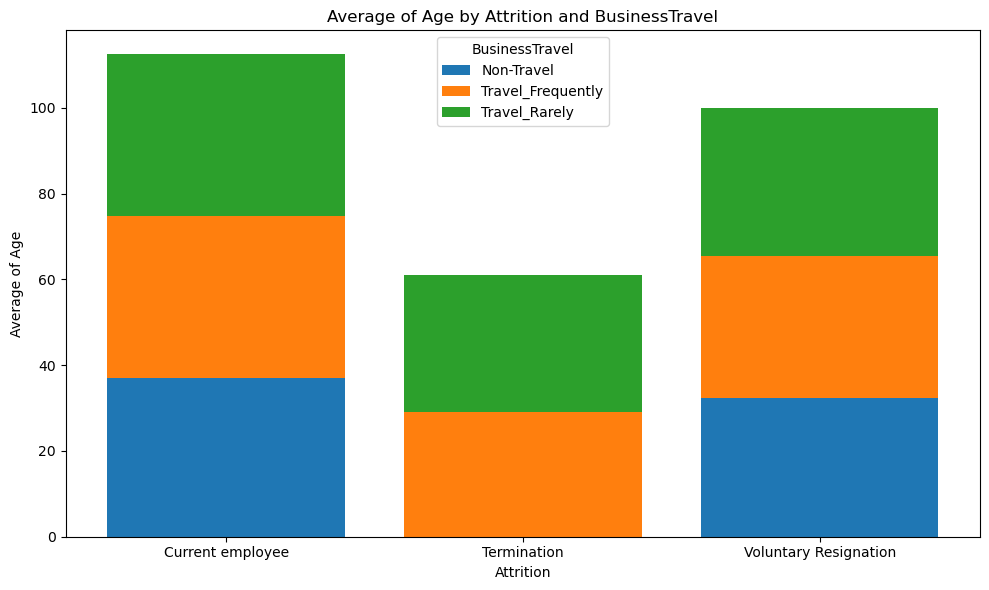

In [9]:
grouped = (
    df.groupby(['Attrition', 'BusinessTravel'])['Age']
    .mean()
    .unstack()
)

business_travel_order = ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
grouped = grouped[business_travel_order]

# Preenche NaN com 0
grouped = grouped.fillna(0)

# Remove linhas vazias (Termination)
grouped = grouped.loc[grouped.sum(axis=1) > 0]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

bottom = None
for category in business_travel_order:
    ax.bar(grouped.index, grouped[category], bottom=bottom, label=category)
    bottom = grouped[category] if bottom is None else bottom + grouped[category]

ax.set_title('Average of Age by Attrition and BusinessTravel')
ax.set_xlabel('Attrition')
ax.set_ylabel('Average of Age')
ax.legend(title='BusinessTravel')

plt.tight_layout()
plt.show()


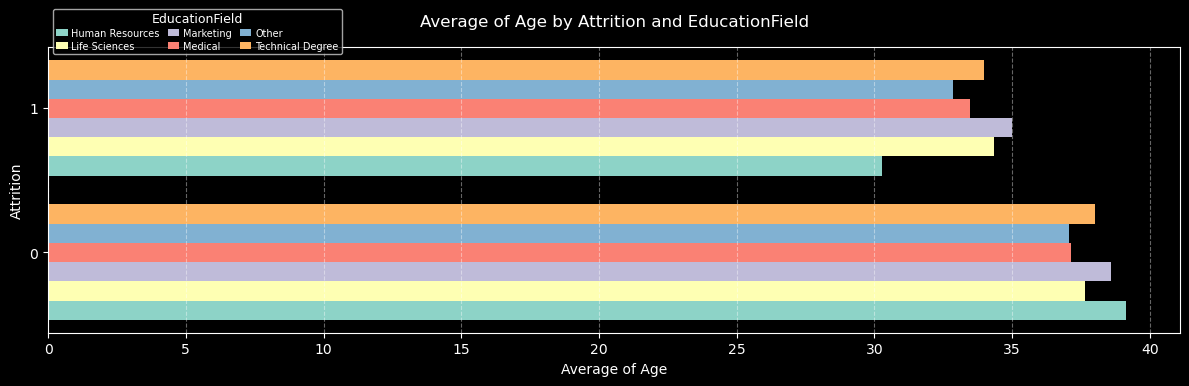

In [32]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Criar tabela dinâmica
pivot = pd.pivot_table(
    df,
    values="Age",
    index="Attrition",
    columns="EducationField",
    aggfunc="mean"
)

# Remover colunas totalmente vazias
pivot = pivot.dropna(axis=1, how="all")

# Preparação do gráfico
attritions = pivot.index.tolist()
education_fields = pivot.columns.tolist()

y = np.arange(len(attritions))
bar_height = 0.8 / len(education_fields)

plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(12, 4))

# Plot das barras
for i, edu in enumerate(education_fields):
    ax.barh(
        y + i * bar_height,
        pivot[edu].values,
        height=bar_height,
        label=edu
    )

# Eixos
ax.set_yticks(y + bar_height * (len(education_fields) / 2))
ax.set_yticklabels(attritions)
ax.set_xlabel("Average of Age")
ax.set_ylabel("Attrition")
ax.set_title("Average of Age by Attrition and EducationField", pad=15)


ax.xaxis.grid(True, linestyle="--", alpha=0.4)
ax.yaxis.grid(False)

# Legenda
ax.legend(
    title="EducationField",
    ncol=3,
    loc="upper left",
    bbox_to_anchor=(0, 1.15),
    fontsize=7,          # texto menor
    title_fontsize=9,    # título menor
    frameon=True,        # mantém a caixa
    borderpad=0.3,       # padding interno
    labelspacing=0.3,    # espaço entre linhas
    handlelength=1.2,    # tamanho do marcador
    handletextpad=0.4,   # espaço marcador-texto
    columnspacing=0.8    # espaço entre colunas
)

plt.tight_layout()
plt.show()

In [11]:
# Filtrar o dataframe para manter apenas 'Current employee' e 'Voluntary Resignation'
df_ = df[df['Attrition'].isin(['Current employee', 'Voluntary Resignation'])]

In [12]:
# Verificar os valores únicos da coluna 'Attrition' após o filtro
df['Attrition'].value_counts()

Attrition
Current employee         19370
Voluntary Resignation     3601
Termination                 87
Name: count, dtype: int64

In [13]:
# Encode da variável alvo
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Voluntary Resignation' else 0)

In [14]:
df['Attrition'].value_counts()

Attrition
0    19457
1     3601
Name: count, dtype: int64

In [15]:
# Separação das variáveis
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [16]:
# Divisão em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
# Separação das variáveis numéricas e categóricas
cat_features = X.select_dtypes(include = ['object']).columns.tolist()
num_features = X.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [18]:
# Cria o pipeline
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

In [19]:
# Cria o pipeline
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [20]:
# Combinando os passos de pré-processamento
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [21]:
# Criando o pipeline de modelagem
modelo = Pipeline(steps = [('preprocessor', preprocessor), 
                               ('classifier', LogisticRegression(max_iter = 1000))])

In [22]:
# Treina o modelo
modelo.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   '...
                                                   'YearsWithCurrManager',
                                                   'AgeStartedWorking ']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime',
                                                   'Employee Source'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [23]:
# Previsões com os dados de teste
y_pred = modelo.predict(X_teste)

In [24]:
# Avalia o modelo
acuracia = accuracy_score(y_teste, y_pred)

In [25]:
print(acuracia)

0.8514744145706852


In [26]:
# Analisando os coeficientes do modelo
coefficients = modelo.named_steps['classifier'].coef_[0]

In [27]:
# Nomes dos atributos
feature_names = num_features + list(modelo.named_steps['preprocessor'] \
                                    .transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_features))

In [28]:
feature_names

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'AgeStartedWorking ',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Dir

In [29]:
# Dataframe
coeff_df = pd.DataFrame({'Atributo': feature_names, 'Coeficiente': coefficients}).sort_values(by = 'Coeficiente', ascending = False)

In [30]:
# Display 
coeff_df.head(10)

,Atributo,Coeficiente
22,BusinessTravel_Travel_Frequently,0.674146
48,OverTime_Yes,0.434145
46,MaritalStatus_Single,0.393571
32,EducationField_Technical Degree,0.308772
37,JobRole_Laboratory Technician,0.297244
43,JobRole_Sales Representative,0.284521
56,Employee Source_Referral,0.263469
26,Department_Sales,0.194966
53,Employee Source_Jora,0.170960
1,DistanceFromHome,0.150482
